### Made in Google Colab

### Import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import glob
from PIL import Image
import os, os.path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### After running the cell below click the restart runtime button in the output and re-run all imports.

In [2]:
!pip install easydev
!pip install colormap
!pip install opencv-python
!pip install colorgram.py
!pip install extcolors

import cv2
import extcolors

from colormap import rgb2hex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='path/to/folder'

### Two ways to collect filenames, the first option makes easier further steps.

In [5]:
input_name = path + 'images_red_wines_clean'
filenames = []

# full name string
for f in os.listdir(input_name):
  ext = str(f)
  filenames.append(ext)

# clean name
'''
for f in os.listdir(input_name):
  ext = str(os.path.splitext(f)[0])
  filenames.append(ext)
'''

'\nfor f in os.listdir(input_name):\n  ext = str(os.path.splitext(f)[0])\n  filenames.append(ext)\n'

### Colors extraction: with tolerance sets up to 0 and limit to 1000 all singles colors are catched.

In [6]:
colors = []

path='path/to/folder/images_red_wines_clean/'

for f in filenames:
    colors.append([f, extcolors.extract_from_path(path + f, tolerance = 0, limit = 1000)]) # with clean name add '.png' after f

### Create a list with all colors labeled by wine name.
### With the commented line only colors in a certain range are appended.

In [7]:
colors_clean = []

for i in colors:
  for j in i[1][0]:
    #if ((j[-1] / colors[0][1][-1]) < 0.12) & ((j[-1] / colors[0][1][-1]) > 0.0012):
      colors_clean.append([i[0], j])

colors_clean = tuple(colors_clean)

In [ ]:
# Name
print('Name: ', colors_clean[0][0])
# R
print('R: ', colors_clean[0][1][0][0])
# G
print('G: ', colors_clean[0][1][0][1])
# B
print('B: ', colors_clean[0][1][0][2])
# Occurrences
print('Occurrences: ', colors_clean[0][1][-1])

Name:  Sotirio 2011'.png
R:  0
G:  0
B:  0
Occurrences:  8199


### Create e dataframe with wine names and the respective color's values

In [8]:
import pandas as pd

d = []

for i in colors_clean:
    d.append(
        {
        'Name':i[0], 
        'R':i[1][0][0], 
        'G':i[1][0][1], 
        'B':i[1][0][2], 
        'Occurences':i[1][-1]
        }
      ) 

df = pd.DataFrame(d)

In [9]:
df

,Name,R,G,B,Occurences
0,Sotirio 2011'.png,0,0,0,8199
1,Sotirio 2011'.png,1,1,0,4688
2,Sotirio 2011'.png,3,3,3,3942
3,Sotirio 2011'.png,2,1,1,3576
4,Sotirio 2011'.png,4,4,4,1851
...,...,...,...,...,...
263871,Rosso 17° 2019'.png,110,50,57,14
263872,Rosso 17° 2019'.png,139,83,87,13
263873,Rosso 17° 2019'.png,218,164,167,11
263874,Rosso 17° 2019'.png,79,40,45,9


In [ ]:
# only if clean name was used
'''
def clean_name(x):
  x = x.replace('\'', '')
  if x.split()[-1].isdigit():
      x = x.replace(x.split()[-1], '')
  else:
      x = x
  return x

df['Name'] = df['Name'].apply(clean_name)

df.head()
'''

In [ ]:
len(df['Name'].unique())

855

### The process below is used to average multiple RGB colors.
### Sum the the squared values of the components of the RGB color. Then when returning the average color, for each color component, find the mean of the sum (of squares) and return its square root.
### `sqrt((R1^2+R2^2)/2),sqrt((G1^2+G2^2)/2),sqrt((B1^2+B2^2)/2)`

In [10]:
df['R'] = df['R'].pow(2)
df['G'] = df['G'].pow(2)
df['B'] = df['B'].pow(2)
df.head()

,Name,R,G,B,Occurences
0,Sotirio 2011'.png,0,0,0,8199
1,Sotirio 2011'.png,1,1,0,4688
2,Sotirio 2011'.png,9,9,9,3942
3,Sotirio 2011'.png,4,1,1,3576
4,Sotirio 2011'.png,16,16,16,1851


In [11]:
df_new = df.groupby('Name').agg({
      'R' : lambda x: np.sqrt(np.mean(x)),
      'G' : lambda x: np.sqrt(np.mean(x)),
      'B' : lambda x: np.sqrt(np.mean(x))
  })

df_new.head()

,R,G,B
Name,,,
(MozArt Wine) Brunello di Montalcino 2016'.png,132.489227,128.214428,113.575149
110 e Lode Merlot 2015'.png,105.456612,88.441845,76.284651
123 Brunello di Montalcino Riserva 2015'.png,130.737008,121.494159,102.666937
16 Primitivo Gioia del Colle 2017'.png,124.957431,105.667262,109.927982
17 Primitivo Gioia del Colle 2017'.png,118.774531,105.430240,102.094201


In [ ]:
df_new.dtypes

R    float64
G    float64
B    float64
dtype: object

In [12]:
df_original = df_new.copy()

### Import necessary libraries for clustering.

### KMedoids is used in order to spot the most represantive wines of the clusters.

### In contrast to the k-means algorithm, k-medoids chooses actual data points as centers (medoids), and thereby allows for greater interpretability of the cluster centers than in k-means, where the center of a cluster is not necessarily one of the input data points (it is the average between the points in the cluster). 

In [13]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

### Clustering operations.

In [15]:
# Scale the DataFrame using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_new)
scaled_df = pd.DataFrame(scaler.transform(df_new),columns= df_new.columns )
scaled_df

,R,G,B
0,0.525385,0.537548,0.518592
1,0.331573,0.286179,0.281708
2,0.512823,0.495075,0.449299
3,0.471386,0.395046,0.495424
4,0.427057,0.393548,0.445661
...,...,...,...
963,0.513848,0.437939,0.485095
964,0.458467,0.521725,0.731146
965,0.520747,0.412720,0.432494
966,0.688510,0.712960,0.832158


Elbow Method to determine the number of clusters to be formed:


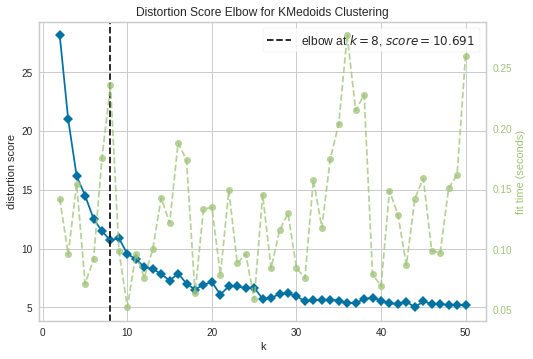

In [ ]:
# Use the elbow method to determine the optimal number of clusters

print('Elbow Method to determine the number of clusters to be formed:')
Elbow = KElbowVisualizer(KMedoids(), k=50)
Elbow.fit(scaled_df)
Elbow.show()

Silhouette Coefficient to determine the number of clusters to be formed:


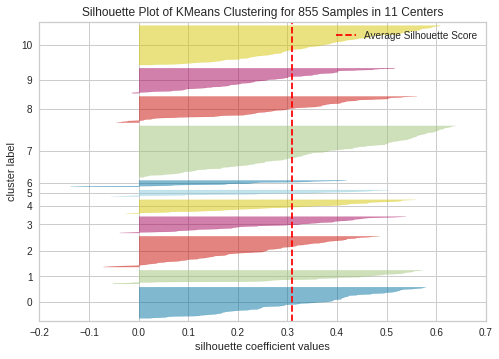

In [ ]:
# Use the silhouette coefficient to determine the optimal number of clusters

print('Silhouette Coefficient to determine the number of clusters to be formed:')
visualizer = SilhouetteVisualizer(KMeans(n_clusters=11), colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

Intercluster Distance to visualize distance between clusters:


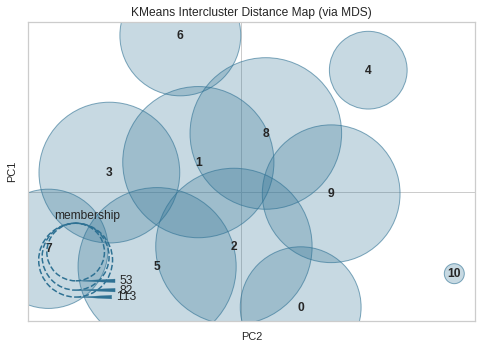

In [ ]:
# Visualize the distance between clusters

print('Intercluster Distance to visualize distance between clusters:')
inter_dis = InterclusterDistance(KMeans(n_clusters=11))
inter_dis.fit(scaled_df)
inter_dis.show()

In [ ]:
# Perform k-medoids clustering for various values of k and calculate the silhouette score for each

for i in range(8, 23, 1):
    kmedoids = KMedoids(n_clusters=i, method='pam', init='build', max_iter=500)
    clusters = kmedoids.fit_predict(scaled_df)
    print('Cluster k: ', i)
    print('Silhouette %s' % silhouette_score(scaled_df, kmedoids.labels_))

Cluster k:  8
Silhouette 0.2969224452398926
Cluster k:  9
Silhouette 0.27603442554903657
Cluster k:  10
Silhouette 0.2622171175447802
Cluster k:  11
Silhouette 0.2594201357214556
Cluster k:  12
Silhouette 0.27867126750276
Cluster k:  13
Silhouette 0.27046084163027573
Cluster k:  14
Silhouette 0.2528847049973153
Cluster k:  15
Silhouette 0.255507954168673
Cluster k:  16
Silhouette 0.2584724815509209
Cluster k:  17
Silhouette 0.26199195247044804
Cluster k:  18
Silhouette 0.2619982749288798
Cluster k:  19
Silhouette 0.25459256564802174
Cluster k:  20
Silhouette 0.2508327643665158
Cluster k:  21
Silhouette 0.2517020969700636
Cluster k:  22
Silhouette 0.2500898863352796


In [16]:
# Perform k-medoids clustering with the optimal number of clusters

kmedoids = KMedoids(n_clusters=8, method='pam', init='build', max_iter=500)
clusters = kmedoids.fit_predict(scaled_df)
df_original["Clusters"]= clusters

In [17]:
# Print the silhouette score of the final clustering

print('Silhouette %s' % silhouette_score(scaled_df, kmedoids.labels_))

Silhouette 0.2969224452398926


In [18]:
# Print the size of each cluster

hist, bins = np.histogram(kmedoids.labels_, bins=range(0, len(set(kmedoids.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(scaled_df)))

Cluster 0: 189 (0.20)
Cluster 1: 125 (0.13)
Cluster 2: 139 (0.14)
Cluster 3: 160 (0.17)
Cluster 4: 45 (0.05)
Cluster 5: 122 (0.13)
Cluster 6: 78 (0.08)
Cluster 7: 110 (0.11)


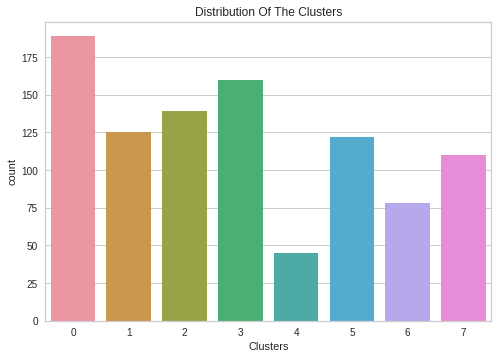

In [19]:
#Plotting countplot of clusters
pl = sns.countplot(x=df_original["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [24]:
df_original.head()

,level_0,index,Name,R,G,B,Clusters
0,0,0,(MozArt Wine) Brunello di Montalcino 2016'.png,132.489227,128.214428,113.575149,3
1,1,1,110 e Lode Merlot 2015'.png,105.456612,88.441845,76.284651,4
2,2,2,123 Brunello di Montalcino Riserva 2015'.png,130.737008,121.494159,102.666937,3
3,3,3,16 Primitivo Gioia del Colle 2017'.png,124.957431,105.667262,109.927982,3
4,4,4,17 Primitivo Gioia del Colle 2017'.png,118.774531,105.430240,102.094201,1


In [ ]:
# Order rows on cluester labels

df_sort = df_original.sort_values(by=['Clusters','R','G', 'B'], ascending=[True, True, True, True])
df_sort

,R,G,B,Clusters
Name,,,,
Sforzato 2015'.png,121.091120,121.725620,151.875183,0
Gaia Principe 2016'.png,122.651476,143.570068,153.083145,0
Vürsù Barbaresco Valeirano 2015'.png,123.155549,125.710805,147.035401,0
Vecchie Vigne Brunello di Montalcino 2015'.png,124.922404,136.783458,147.894066,0
Fuochi 2018'.png,127.328015,125.244983,144.956505,0
...,...,...,...,...
Lu Ceppu Negroamaro 2020'.png,176.982268,78.516029,72.788448,7
Vigneto Bordini Barbaresco 2018'.png,177.378421,110.860592,103.256053,7
Amarone della Valpolicella Classico 2011'.png,179.673827,132.739210,85.870862,7


In [ ]:
df_stats = df_sort.groupby('Clusters').agg(
    max_R=('R', np.max),
    min_R=('R', np.min),
    avg_R=('R', np.mean),
    max_G=('G', np.max),
    min_G=('G', np.min),
    avg_G=('G', np.mean),
    max_B=('B', np.max),
    min_B=('B', np.min),
    avg_B=('B', np.mean)
)

df_stats

,max_R,min_R,avg_R,max_G,min_G,avg_G,max_B,min_B,avg_B
Clusters,,,,,,,,,
0,153.688279,121.091120,141.506592,148.799678,121.505598,135.969856,153.083145,113.974900,131.584103
1,136.618628,78.129866,114.787777,129.224671,83.570306,102.763779,131.713295,64.247001,96.091688
2,168.742735,138.136221,154.259943,162.739043,139.285093,149.742405,162.936827,136.069013,145.802138
3,139.549274,106.653443,126.941748,137.303799,104.899279,119.985215,134.712228,97.527322,115.131130
4,128.095082,59.209357,97.334303,100.048165,43.161372,80.387304,91.204854,31.938128,70.270278
5,195.912155,150.841752,163.038511,165.372185,122.444363,144.795925,143.955456,110.401594,129.627939
6,198.687680,155.214167,171.113807,201.385520,150.253464,165.120595,189.358500,130.978939,158.398027
7,187.551268,131.301690,149.324161,148.321391,78.516029,120.245622,119.157992,46.860805,98.752116


In [23]:
df_original = df_original.reset_index()
df_original.head()
df_original.to_csv('path/to/folder/df_reds_cluster.csv', index=False)

In [ ]:
df_original.groupby('Clusters').count()

,Name,R,G,B
Clusters,,,,
0,189,189,189,189
1,125,125,125,125
2,139,139,139,139
3,160,160,160,160
4,45,45,45,45
5,122,122,122,122
6,78,78,78,78
7,110,110,110,110


In [ ]:
filenames_full = df_original['Name'].unique()
filenames_full[:10]

array(["(MozArt Wine) Brunello di Montalcino 2016'.png",
       "110 e Lode Merlot 2015'.png",
       "123 Brunello di Montalcino Riserva 2015'.png",
       "16 Primitivo Gioia del Colle 2017'.png",
       "17 Primitivo Gioia del Colle 2017'.png",
       "1921 Primitivo di Manduria Riserva 2013'.png",
       "25 anni Montefalco Sagrantino 2015'.png",
       "28 Clones Poggio Ai Chiari Sangiovese Toscana 2010'.png",
       "5 Stelle Sfursat 2017'.png", "50 & 50 2017'.png"], dtype=object)

In [ ]:
kmedoids.labels_[:10]

array([3, 4, 3, 3, 1, 0, 0, 6, 0, 7])

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames_full,kmedoids.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
from skimage import io

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to n images to be shown at a time
    if len(files) > 11:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:10]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = io.imread(file)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 139 to 10


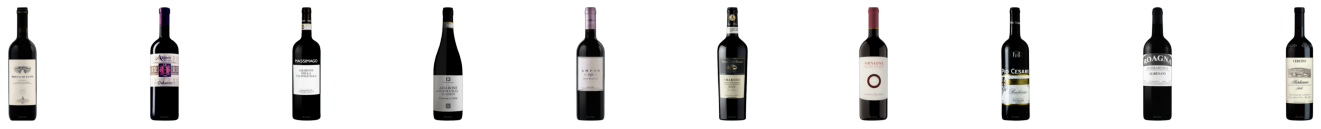

In [ ]:
view_cluster(2)

In [ ]:
kmedoids.cluster_centers_

array([[0.59445823, 0.59209728, 0.6367347 ],
       [0.40136664, 0.37996169, 0.40902902],
       [0.67588478, 0.67724102, 0.7223284 ],
       [0.48565795, 0.48410879, 0.52220274],
       [0.2733218 , 0.26867313, 0.25707389],
       [0.73006521, 0.65537706, 0.6266377 ],
       [0.79154296, 0.773515  , 0.78982685],
       [0.62819335, 0.48329283, 0.44888818]])

In [ ]:
kmedoids.medoid_indices_

array([937, 947, 819,  16, 563, 148, 781, 721])

### Medoids wines

In [ ]:
for i in kmedoids.medoid_indices_:
  pd.set_option('display.max_colwidth', None)
  print(df_original[['Name', 'Clusters']].iloc[i])
  print('-'*85)

Name        Vigna Valferana 2014'.png
Clusters                            0
Name: 937, dtype: object
-------------------------------------------------------------------------------------
Name        Vigneto Monte Sant'Urbano Amarone della Valpolicella Classico 2015'.png
Clusters                                                                          1
Name: 947, dtype: object
-------------------------------------------------------------------------------------
Name        Settebraccia 2018'.png
Clusters                         2
Name: 819, dtype: object
-------------------------------------------------------------------------------------
Name        Acinatico Amarone della Valpolicella Classico 2018'.png
Clusters                                                          3
Name: 16, dtype: object
-------------------------------------------------------------------------------------
Name        Lagrein Riserva Vigna Castel Ringberg 2016'.png
Clusters                                       